In [1]:
import numpy as np
import pandas as pd

In [2]:
#col_names = ["DestinationPort","FlowDuration","TotalFwdPackets","TotalBackwardPackets","TotalLengthofFwdPackets","TotalLengthofBwdPackets","FwdPacketLengthMax","FwdPacketLengthMin","FwdPacketLengthMean","FwdPacketLengthStd","BwdPacketLengthMax","BwdPacketLengthMin","BwdPacketLengthMean","BwdPacketLengthStd","FlowBytes/s","FlowPackets/s","FlowIATMean","FlowIATStd","FlowIATMax","FlowIATMin","FwdIATTotal","FwdIATMean","FwdIATStd","FwdIATMax","FwdIATMin","BwdIATTotal","BwdIATMean","BwdIATStd","BwdIATMax","BwdIATMin","FwdPSHFlags","BwdPSHFlags","FwdURGFlags","BwdURGFlags","FwdHeaderLength","BwdHeaderLength","FwdPackets/s","BwdPackets/s","MinPacketLength","MaxPacketLength","PacketLengthMean","PacketLengthStd","PacketLengthVariance","FINFlagCount","SYNFlagCount","RSTFlagCount","PSHFlagCount","ACKFlagCount","URGFlagCount","CWEFlagCount","ECEFlagCount","Down/UpRatio","AveragePacketSize","AvgFwdSegmentSize","AvgBwdSegmentSize","FwdHeaderLength","FwdAvgBytes/Bulk","FwdAvgPackets/Bulk","FwdAvgBulkRate","BwdAvgBytes/Bulk","BwdAvgPackets/Bulk","BwdAvgBulkRate","SubflowFwdPackets","SubflowFwdBytes","SubflowBwdPackets","SubflowBwdBytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","ActiveMean","ActiveStd","ActiveMax","ActiveMin","IdleMean","IdleStd","IdleMax","IdleMin","Label"]
data = pd.read_csv('02-14-2018.csv', sep=",")#names=col_names)
data.head(3)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign


In [4]:

print(data['Label'].value_counts(sort=1))
#print(data.iloc[:,79].value_counts(sort=1))
#data.iloc[:,79][data.iloc[:,79] == 'BENIGN'] = 0
#data.iloc[:,79][data.iloc[:,79] == 'FTP-BruteForce'] = 1
#data.iloc[:,79][data.iloc[:,79] == 'SSH-Bruteforce'] = 2
data.Label[data.Label == 'Benign'] = 1
data.Label[data.Label == 'FTP-BruteForce'] = 0
data.Label[data.Label == 'SSH-Bruteforce'] = -1

data.head(3)

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64


C:\Users\THOBAN~1\AppData\Local\Temp/ipykernel_21436/3391358255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label[data.Label == 'Benign'] = 1
C:\Users\THOBAN~1\AppData\Local\Temp/ipykernel_21436/3391358255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label[data.Label == 'FTP-BruteForce'] = 0
C:\Users\THOBAN~1\AppData\Local\Temp/ipykernel_21436/3391358255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,1
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,1
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,1


In [5]:
#import numpy as np
#np.where(data.values >= np.finfo(np.float64).max)
#data.fillna(0)
#data.isnull().any().any()  
print(data['Label'].value_counts(sort=1))

 1    667626
 0    193360
-1    187589
Name: Label, dtype: int64


In [37]:
#np.isnan(data.values.any())
#data.isnull().any().any()
   #data.isna().sum().sum()
#else:
  #print("no NaN values")  



In [6]:
def clean_dataset(data):
  assert isinstance (data, pd.DataFrame), "df need to be a pd.DataFrame"
  data.dropna(inplace=True)
  indices_to_keep=~data.isin([np.nan, np.inf, -np.inf]).any(1)
  return data[indices_to_keep].astype(np.float64)
data = data.drop(labels=['Timestamp'], axis=1)
data = clean_dataset(data)

In [39]:
#with open('readme.txt', 'w') as f:
#    f.write(str(data))

In [7]:
#Y = data.iloc[:,78]
Y = data['Label']
print(Y)
#X = data.drop(data.columns[78],axis=1)
X = data.drop(labels=['Label'], axis=1)

#print(X)
print(X.shape)
print(Y.shape)

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1048570    1.0
1048571    1.0
1048572    1.0
1048573    1.0
1048574    1.0
Name: Label, Length: 1044751, dtype: float64
(1044751, 78)
(1044751,)


In [13]:
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size= 0.3,random_state=20)
len(ytest)
K = math.sqrt(len(ytest))
K
if(int(K)%2 == 0):
    K = K-1
print(K,"The int version is", int(K))    

559.8446213013036 The int version is 559


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=int(K))
knn_model.fit(xtrain,ytrain)
knn_model.score(xtest,ytest)

0.9973486564611742

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     56272
         0.0       1.00      1.00      1.00     57982
         1.0       1.00      1.00      1.00    199172

    accuracy                           1.00    313426
   macro avg       1.00      1.00      1.00    313426
weighted avg       1.00      1.00      1.00    313426



[[ 56083     79    110]
 [    57  57924      1]
 [   381    203 198588]]




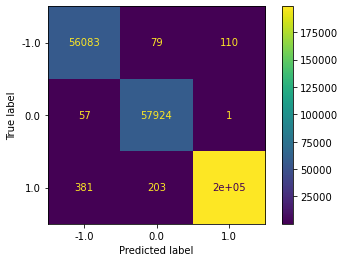

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
Pred = knn_model.predict(xtest)
print(classification_report(ytest,Pred))
plot_confusion_matrix(knn_model,xtest,ytest)
print("\n")
print(confusion_matrix(ytest,Pred))
print("\n")

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


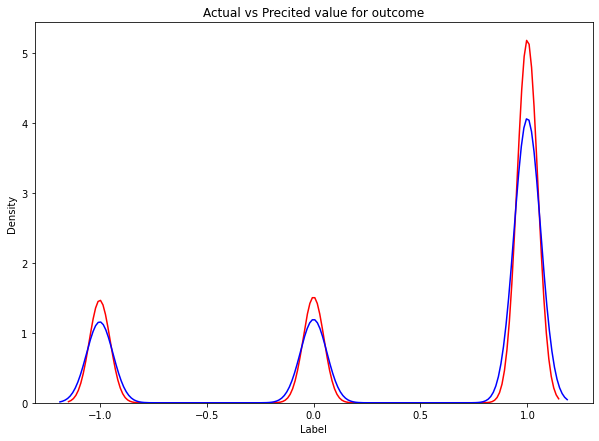

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
ax = sns.distplot(data.iloc[:,78], hist=False, color="r", label="Actual Value")
sns.distplot(Pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()